In [48]:
import numpy as np
from numpy import linalg as LA
import sympy
import math
from sympy.solvers import solve
from sympy import Symbol
from sympy import Eq
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
import pandas as pd

In [88]:
class bond:
   def __init__(self, ISIN, ten_day_price, maturity_date, coupon_rate, periods):
      self.ISIN = ISIN
      self.ten_day_price = ten_day_price
      self.maturity_date = maturity_date
      self.coupon_rate = coupon_rate
      self.periods = periods

In [89]:
all_bonds = pd.read_csv('bond_prices.csv')

In [90]:
all_bonds["ISIN"][1]

'CA135087D507'

In [91]:
#Select the 10 bonds that we're interested in 
desired_ISIN = np.array(["CA135087J546", "CA135087J967", "CA135087L518", "CA135087L930", "CA135087P246", "CA135087P659", "CA135087N837", "CA135087P576", "CA135087P733", "CA135087Q491"])
select_bonds = all_bonds[all_bonds["ISIN"].isin(desired_ISIN)]
#Exclude the first column
select_bonds = select_bonds.iloc[:, 1:]
select_bonds


,0,1,2,3,4,5,6,7,8,9,10,Coupon,ISIN,issue date,maturity date
3,99.63,99.640,99.650,99.660,99.670,99.680,99.680,99.680,99.700,99.720,99.72,0.0250,CA135087J546,10/5/2018,3/1/2024
4,97.96,97.980,97.980,97.980,98.020,98.050,97.970,97.970,97.990,98.000,98.03,0.0150,CA135087J967,4/5/2019,9/1/2024
7,92.86,92.860,92.840,92.850,93.020,93.000,92.790,92.570,92.540,92.540,92.55,0.0025,CA135087L518,10/9/2020,3/1/2026
9,93.46,93.440,93.550,93.530,93.600,93.570,93.400,93.120,93.080,93.070,93.00,0.0100,CA135087L930,4/16/2021,9/1/2026
15,98.19,98.200,98.260,98.250,98.310,98.310,98.210,98.020,97.980,97.970,97.90,0.0300,CA135087P246,7/25/22,10/1/25
17,99.13,99.135,99.146,99.127,99.242,99.277,99.111,99.029,99.014,99.025,99.04,0.0375,CA135087P659,11/2/22,2/1/25
33,97.58,97.591,97.603,97.520,97.740,97.772,97.441,97.092,96.956,96.947,96.94,0.0275,CA135087N837,5/13/22,9/1/27
35,100.50,100.480,100.439,100.328,100.637,100.673,100.220,99.834,99.662,99.623,99.67,0.0350,CA135087P576,10/21/22,3/1/28
36,99.24,99.250,99.280,99.170,99.390,99.410,99.100,98.750,98.610,98.600,98.57,0.0325,CA135087P733,12/2/22,8/24/27
37,99.74,99.720,99.720,99.550,99.880,99.910,99.440,98.990,98.810,98.770,98.83,0.0325,CA135087Q491,4/21/23,9/1/28


In [92]:
ten_day_2024_03_01= select_bonds[select_bonds["ISIN"] == "CA135087J546"]
date = datetime.date(2024, 3, 1)
bond_2024_03_01 = bond("CA135087D929", ten_day_2024_03_01.iloc[:,:11].to_dict(), date, ten_day_2024_03_01["Coupon"], 0)

ten_day_2024_09_01 = select_bonds[select_bonds["ISIN"] == "CA135087J967"]
date = datetime.date(2024, 9, 1)
bond_2024_9_1 = bond("CA135087YZ11", ten_day_2024_09_01.iloc[:,:11].to_dict(), date, ten_day_2024_09_01["Coupon"], 0)

ten_day_2025_2_1 = select_bonds[select_bonds["ISIN"] == "CA135087P659"]
date = datetime.date(2025, 2, 1)
bond_2025_2_1 = bond("CA135087E596", ten_day_2025_2_1.iloc[:,:11].to_dict(), date, ten_day_2025_2_1["Coupon"], 1)

ten_day_2025_10_1 = select_bonds[select_bonds["ISIN"] == "CA135087P246"]
date = datetime.date(2025, 10, 1)
bond_2025_10_1 = bond("CA135087F254", ten_day_2025_10_1.iloc[:,:11].to_dict(), date, ten_day_2025_10_1["Coupon"], 2)

ten_day_2026_3_1 = select_bonds[select_bonds["ISIN"] == "CA135087L518"]
date = datetime.date(2026, 3, 1)
bond_2026_3_1 = bond("CA135087F585", ten_day_2026_3_1.iloc[:,:11].to_dict(), date, ten_day_2026_3_1["Coupon"], 3)

ten_day_2026_9_1 = select_bonds[select_bonds["ISIN"] == "CA135087L518"]
date = datetime.date(2026, 9, 1)
bond_2026_9_1 = bond("CA135087G328", ten_day_2026_9_1.iloc[:,:11].to_dict(), date, ten_day_2026_9_1["Coupon"], 4)

ten_day_2027_8_24 = select_bonds[select_bonds["ISIN"] == "CA135087P733"]
date = datetime.date(2027, 8, 24)
bond_2027_8_24= bond("CA135087H490", ten_day_2027_8_24.iloc[:,:11].to_dict(), date, ten_day_2027_8_24["Coupon"], 5)

ten_day_2027_9_1 = select_bonds[select_bonds["ISIN"] == "CA135087N837"]
date = datetime.date(2027, 9, 1)
bond_2027_9_1 = bond("CA135087J546", ten_day_2027_9_1.iloc[:,:11].to_dict(), date, ten_day_2027_9_1["Coupon"], 6)

ten_day_2028_3_1 = select_bonds[select_bonds["ISIN"] == "CA135087P576"]
date = datetime.date(2028, 3, 1)
bond_2028_3_1 = bond("CA135087J967", ten_day_2028_3_1.iloc[:,:11].to_dict(), date, ten_day_2028_3_1["Coupon"], 7)

ten_day_2028_9_1 = select_bonds[select_bonds["ISIN"] == "CA135087Q491"]
date = datetime.date(2028, 9, 1)
bond_2028_9_1 = bond("CA135087K528", ten_day_2028_9_1.iloc[:,:11].to_dict(), date, ten_day_2028_9_1["Coupon"], 8)

In [94]:
print(bond)

In [93]:
bonds_list = []
bonds_list.append(bond_2024_03_01)
bonds_list.append(bond_2024_9_1)
bonds_list.append(bond_2025_2_1)
bonds_list.append(bond_2025_10_1)
bonds_list.append(bond_2026_3_1)
bonds_list.append(bond_2026_9_1)
bonds_list.append(bond_2027_8_24)
bonds_list.append(bond_2027_9_1)
bonds_list.append(bond_2028_3_1)


#Convert the keys of each bond.ten_day_price to an integer
for bond in bonds_list:
    for key in bond.ten_day_price.keys():
        new_key = int(key)
        bond.ten_day_price[new_key] = bond.ten_day_price.pop(key)


RuntimeError: dictionary keys changed during iteration

In [55]:
bonds_list

In [56]:
record_date_dict = {}
record_date_dict[0] = datetime.date(2024, 3, 1)
record_date_dict[1] = datetime.date(2024, 9, 1)
record_date_dict[2] = datetime.date(2025, 2, 1)
record_date_dict[3] = datetime.date(2025, 10, 1)
record_date_dict[4] = datetime.date(2026, 3, 1)
record_date_dict[5] = datetime.date(2026, 9, 1)
record_date_dict[6] = datetime.date(2027, 8, 24)
record_date_dict[7] = datetime.date(2027, 9, 1)
record_date_dict[8] = datetime.date(2028, 3, 1)
record_date_dict[9] = datetime.date(2028, 9, 1)

In [61]:
def calculate_present_value(bond, day):
    # calculate the dirty price for this bond
    dirty_price = bond.coupon_rate * (183 - (31- day) - 29) / 183
    # with dirty price and close price we can calculate the present
    # value for a certain bond based on this day's observation
    print(bond.ten_day_price)
    present_value = round(dirty_price + bond.ten_day_price[day], 4)
    return present_value

In [62]:
def calculate_year_difference(date_one, date_two):
    duration_in_s = (date_two - date_one).total_seconds()
    return round(divmod(duration_in_s, 86400)[0] / 365, 3)

def generate_year_fraction_dict(recording_date, year_fraction_dict, counter = 0):
    for i in range(len(bonds_list)-1):
        year_fraction = calculate_year_difference(recording_date, 
                                              bonds_list[i].maturity_date)
        year_fraction_dict[counter] = year_fraction

        if calculate_year_difference(bonds_list[i].maturity_date,
                                     bonds_list[i+1].maturity_date) > 0.6:
            
            later_year_fraction = calculate_year_difference(recording_date, 
                                              bonds_list[i+1].maturity_date)
            year_fraction_dict[counter + 1] = (later_year_fraction +
                                               year_fraction)/2
            counter += 1
        counter += 1
    year_fraction_dict[counter] = calculate_year_difference(recording_date,
                                                        bonds_list[-1].maturity_date)
    return year_fraction_dict

In [63]:
periods_dict = {}
periods_dict[0] = 0
periods_dict[1] = 1
periods_dict[2] = 2
periods_dict[3] = 3
periods_dict[4] = 4
periods_dict[5] = 6
periods_dict[6] = 8
periods_dict[7] = 9
periods_dict[8] = 10

def total_present_value(face_value, coupon, periods, rate, year_fraction_dict):
    total_pv = 0
    total_periods = periods_dict[periods]

    if (periods == 0):
        total_pv += face_value * math.exp(-year_fraction_dict[0] * rate)
    else:
        for i in range(total_periods):
            total_pv += coupon * math.exp(-year_fraction_dict[i] * rate)
        total_pv += face_value * math.exp(-year_fraction_dict[i+1] * rate)
    return total_pv
 
def calculate_ytm(bond, day, year_fraction_dict):
    # print(bond.maturity_date)
    present_value = calculate_present_value(bond, day)
    face_value = bond.coupon_rate + 100
    coupon = bond.coupon_rate
    periods = bond.periods

    ytm_one= coupon/100
    condition_one = True
    while condition_one:
        if (present_value < face_value):
            ytm_one -= 0.000001
        else:
            ytm_one += 0.000001
 
        total_pv_one = total_present_value(face_value, coupon, periods, ytm_one, year_fraction_dict)
 
        if (present_value < face_value):
            condition_one = total_pv_one < present_value
        else:
            condition_one = total_pv_one > present_value
    # print("YTM ONE", ytm_one * 100)

    ytm_two= coupon/100
    condition_two = True
    while condition_two:
        if (present_value < face_value):
            ytm_two += 0.000001
        else:
            ytm_two -= 0.000001
 
        total_pv_two = total_present_value(face_value, coupon, periods, ytm_two, year_fraction_dict)
 
        if (present_value < face_value):
            condition_two = total_pv_two > present_value
        else:
            condition_two = total_pv_two < present_value
    # print("YTM TWO", ytm_two * 100)
    return max(ytm_one * 100, ytm_two * 100)

In [64]:
def generate_ytm_per_day(bonds_list):
    day_to_raw_ytm_dict = {}
    day_to_full_ytm_dict = {}
    # day_to_present_value_dict = {}
    day_to_year_fraction_dict = {}

    # loop through all ten days
    for i in range(10):
        # a list to store ytm for 9 time periods (such as 2020.3.1, 2020.9.1etc)
        # based on the observation of a single date
        raw_ytm_list = []
        full_ytm_list = []
        # a list to store present values for 9 time periods
        # based on the observation of a single date
        present_value_list = []
        # a dict to store the year fraction information
        # calculate the number of years between the day of observation
        # and the maturity date of the bond, eg. the bond matures 1.12
        # in years from today
        input_dict = {}
        year_fraction_dict = generate_year_fraction_dict(record_date_dict[i],
                                                         input_dict)

        # loop through all bonds by index
        j = 0
        # for j in range(len(bonds_list) - 1):
        while(j < len(bonds_list)-1):
            bond = bonds_list[j]
            next_bond = bonds_list[j+1]
            ytm = calculate_ytm(bond, i, year_fraction_dict)
            raw_ytm_list.append(ytm)
            full_ytm_list.append(ytm)
            if calculate_year_difference(bond.maturity_date, 
                                        next_bond.maturity_date) > 0.6:
                next_bond_ytm = calculate_ytm(next_bond, i, year_fraction_dict)
                average_ytm = (next_bond_ytm + ytm)/2
                full_ytm_list.append(average_ytm)
            j += 1

        last_bond = bonds_list[-1]
        last_ytm = calculate_ytm(last_bond, i, year_fraction_dict)
        raw_ytm_list.append(last_ytm)
        full_ytm_list.append(last_ytm)
        print(full_ytm_list)
        day_to_raw_ytm_dict[i] = raw_ytm_list
        day_to_full_ytm_dict[i] = full_ytm_list
        day_to_year_fraction_dict[i] = year_fraction_dict

    # print(day_to_raw_ytm_dict)
    # print(day_to_full_ytm_dict)
    # print(day_to_year_fraction_dict)
    return day_to_raw_ytm_dict, day_to_full_ytm_dict, day_to_year_fraction_dict

day_to_raw_ytm_dict, day_to_full_ytm_dict, day_to_year_fraction_dict = generate_ytm_per_day(bonds_list)

0
{'Unnamed: 0': {3: 4}, '0': {3: 99.63}, '1': {3: 99.64}, '2': {3: 99.65}, '3': {3: 99.66}, '4': {3: 99.67}, '5': {3: 99.68}, '6': {3: 99.68}, '7': {3: 99.68}, '8': {3: 99.7}, '9': {3: 99.72}, '10': {3: 99.72}, 'Coupon': {3: 0.025}, 'ISIN': {3: 'CA135087J546'}, 'issue date': {3: '10/5/2018'}, 'maturity date': {3: '3/1/2024'}}


KeyError: 0

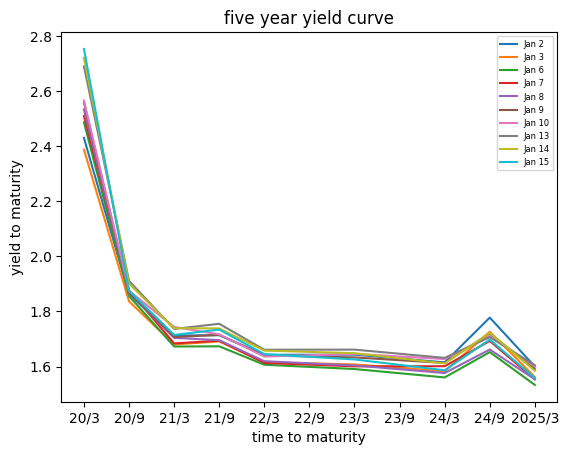

In [77]:
# for i in range(10):
#     plt.plot(day_to_full_ytm_dict[i])

# maturity_list = []

dates = ['Jan 2', 'Jan 3', 'Jan 6', 'Jan 7', 'Jan 8', 'Jan 9', 'Jan 10', 'Jan 13', 'Jan 14', 'Jan 15']
plt.xlabel('time to maturity')
plt.ylabel('yield to maturity')
plt.title('five year yield curve')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],labels = ['20/3','20/9','21/3','21/9', '22/3', '22/9', '23/3', '23/9', '24/3', '24/9','2025/3'])
for i in range(10):
    plt.plot(day_to_full_ytm_dict[i], label = dates[i])
plt.legend(loc=1, prop={'size': 6})
plt.show()

In [24]:
def total_spot_rate_present_value(face_value, coupon, periods, rate, year_fraction_dict, spot_rate_list, with_gap):
    total_pv = 0
    total_periods = periods_dict[periods]


    if with_gap == False:
        for i in range(total_periods):
            total_pv += coupon * math.exp(-year_fraction_dict[i] * (spot_rate_list[i]/100))
        total_pv += face_value * math.exp(-year_fraction_dict[i+1] * rate)
    else:
        for i in range(total_periods - 1):
            total_pv += coupon * math.exp(-year_fraction_dict[i] * (spot_rate_list[i]/100))
        # print(coupon * math.exp(-year_fraction_dict[i+1] * ((spot_rate_list[-1]/100 + rate)/2)))
        # print(spot_rate_list[-1])
        # print(rate)
        # print((spot_rate_list[-1]/100 + rate)/2)
        total_pv += coupon * math.exp(-year_fraction_dict[i+1] * ((spot_rate_list[-1]/100 + rate)/2))
        # print(face_value * math.exp(-year_fraction_dict[i+2] * rate))
        total_pv += face_value * math.exp(-year_fraction_dict[i+2] * rate)


    return total_pv


def calculate_spot_rate(bond, day, bond_index, year_fraction_dict, spot_rate_list, ytm_list, with_gap):
    present_value = calculate_present_value(bond, day)
    
    face_value = bond.coupon_rate + 100
    coupon = bond.coupon_rate
    periods = bond.periods
    spot_rate_one = ytm_list[bond_index]/100

    condition_one = True
    while condition_one:
        if (present_value < face_value):
            spot_rate_one -= 0.000001
        else:
            spot_rate_one += 0.000001
 
        total_pv_one = total_spot_rate_present_value(face_value, coupon, periods,
                                      spot_rate_one, year_fraction_dict,
                                      spot_rate_list, with_gap)

        if (present_value < face_value):
            condition_one = total_pv_one < present_value
        else:
            condition_one = total_pv_one > present_value

    spot_rate_two= ytm_list[bond_index]/100
    condition_two = True
    while condition_two:
        if (present_value < face_value):
            spot_rate_two += 0.000001
        else:
            spot_rate_two -= 0.000001

        total_pv_two = total_spot_rate_present_value(face_value, coupon, periods,
                                      spot_rate_two, year_fraction_dict,
                                      spot_rate_list, with_gap)
        
        if (present_value < face_value):
            condition_two = total_pv_two > present_value
        else:
            condition_two = total_pv_two < present_value


    return max(spot_rate_one*100, spot_rate_two*100)



year_fraction_dict = {}
year_fraction_dict[0] = 0.162
year_fraction_dict[1] = 0.666
year_fraction_dict[2] = 1.162
year_fraction_dict[3] = 1.666
year_fraction_dict[4] = 2.162
year_fraction_dict[5] = 2.666
year_fraction_dict[6] = 3.162
year_fraction_dict[7] = 3.666
year_fraction_dict[8] = 4.162
bond = bonds_list[2]
day = 1
bond_index = 5
spot_rate_list = [2.430500000000298, 1.8611000062756204, 1.7118000050331317, 1.713200005043125, 1.6417000044501946]
ytm_list = [2.3690000000002365, 1.8012999999997188, 1.6776999999995952, 1.7076999999996252, 1.6232999999995574, 1.6204999999995529, 1.6927999999995602, 1.5533999999994534]
x = calculate_spot_rate(bond, day, bond_index, year_fraction_dict, spot_rate_list, ytm_list, True)
print(x)

1


KeyError: 1

In [14]:
def generate_spot_rate_per_day(bonds_list, day_to_year_fraction_dict):
    spot_rate_dict = {}
    for i in range(10):
        spot_rate_list = []
        for j in range(len(bonds_list)):
            ytm_list = day_to_raw_ytm_dict[i]

            if j == 0:
                spot_rate_list.append(ytm_list[0])
            if j >= 1:
                prev_bond = bonds_list[j-1]
                bond = bonds_list[j]
                if calculate_year_difference(prev_bond.maturity_date, 
                                             bond.maturity_date) > 0.6:
                    spot_rate = calculate_spot_rate(bond, i, j,
                                                    day_to_year_fraction_dict[i],
                                                    spot_rate_list, 
                                                    ytm_list, True)
                    spot_rate_list.append((spot_rate_list[-1] + spot_rate)/2)
                    spot_rate_list.append(spot_rate)
                else:
                    spot_rate = calculate_spot_rate(bond, i, j,
                                                    day_to_year_fraction_dict[i],
                                                    spot_rate_list,
                                                    ytm_list, False)
                    spot_rate_list.append(spot_rate)
        print(spot_rate_list)
        spot_rate_dict[i] = spot_rate_list
    return spot_rate_dict

                    
spot_rate_dict = generate_spot_rate_per_day(bonds_list, day_to_year_fraction_dict)   

[2.430500000000298, 1.8618999999997794, 1.7126999999996302, 1.7138999999996314, 1.6424999999995766, 1.642849999999576, 1.6431999999995757, 1.6291499999996533, 1.615099999999731, 1.781499999999649, 1.6000999999994843]
[2.3880000000002557, 1.8366999999997542, 1.6802999999995978, 1.6911999999996086, 1.6154999999995496, 1.611599999999545, 1.60769999999954, 1.5951999999996194, 1.5826999999996987, 1.7292999999995968, 1.5615999999994472]
[2.487400000000355, 1.8560999999997736, 1.6726999999995902, 1.673499999999591, 1.6064999999995406, 1.5987499999995318, 1.5909999999995232, 1.5756999999996018, 1.5603999999996803, 1.653599999999521, 1.5331999999994683]
[2.5102000000003777, 1.8768999999997944, 1.6840999999996016, 1.6937999999996112, 1.612999999999547, 1.60684999999954, 1.600699999999533, 1.600949999999625, 1.601199999999717, 1.6946999999995622, 1.5534999999994534]
[2.5340000000004017, 1.8669999999997844, 1.7043999999996218, 1.6956999999996132, 1.6193999999995534, 1.611699999999545, 1.6039999999

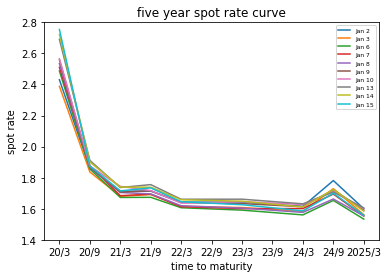

In [15]:
# for i in range(10):
#   plt.plot(spot_rate_dict[i])
dates = ['Jan 2', 'Jan 3', 'Jan 6', 'Jan 7', 'Jan 8', 'Jan 9', 'Jan 10', 'Jan 13', 'Jan 14', 'Jan 15']
plt.xlabel('time to maturity')
plt.ylabel('spot rate')
plt.title('five year spot rate curve')
axes = plt.gca()
axes.set_ylim([1.4, 2.8])
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],labels = ['20/3','20/9','21/3','21/9', '22/3', '22/9', '23/3', '23/9', '24/3', '24/9','2025/3'])
for i in range(10):
    plt.plot(spot_rate_dict[i], label = dates[i])
plt.legend(loc=1, prop={'size': 6})
plt.savefig('/content/drive/My Drive/Colab Notebooks/A4/spot_rate.png')
plt.show()

In [16]:
def generate_forward_rate(spot_rate_dict):
    forward_rate_dict = {}
    for i in range(len(spot_rate_dict)):
        forward_rate_list = []
        r_0_1 = spot_rate_dict[i][2]

        j = 2
        k = 4
        print
        while(k < len(spot_rate_dict[0])):
            forward = (spot_rate_dict[i][k] * j - r_0_1)/(j-1)
            forward_rate_list.append(forward)        
            j += 1
            k += 2
            
        print(forward_rate_list)
        forward_rate_dict[i] = forward_rate_list
    return forward_rate_dict


forward_rate_dict = generate_forward_rate(spot_rate_dict)

[1.572299999999523, 1.6084499999995483, 1.5825666666664313, 1.5719499999994477]
[1.5506999999995015, 1.5713999999995112, 1.5501666666663991, 1.5319249999994096]
[1.540299999999491, 1.5501499999994897, 1.5229666666663768, 1.4983249999994377]
[1.5418999999994925, 1.558999999999499, 1.5735666666664223, 1.5208499999994163]
[1.534399999999485, 1.5537999999994938, 1.533866666666383, 1.516024999999411]
[1.5732999999995239, 1.5962499999995363, 1.5814999999997637, 1.5613499999994371]
[1.5286999999994795, 1.5965999999995364, 1.5884333333331038, 1.5652749999994409]
[1.5856999999995365, 1.623999999999564, 1.5964999999997787, 1.5719999999994478]
[1.5764999999995273, 1.6030999999995428, 1.5684999999997504, 1.5457999999994216]
[1.5750999999995259, 1.5811499999995209, 1.5434999999997254, 1.5189749999994044]


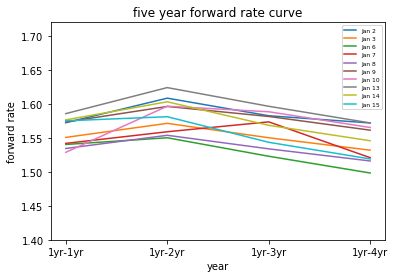

In [17]:
dates = ['Jan 2', 'Jan 3', 'Jan 6', 'Jan 7', 'Jan 8', 'Jan 9', 'Jan 10', 'Jan 13', 'Jan 14', 'Jan 15']
plt.xlabel('year')
plt.ylabel('forward rate')
plt.title('five year forward rate curve')
axes = plt.gca()
axes.set_ylim([1.4, 1.72])
plt.xticks(ticks = [0, 1, 2, 3],labels = ['1yr-1yr','1yr-2yr','1yr-3yr','1yr-4yr'])
for i in range(10):
    plt.plot(forward_rate_dict[i], label = dates[i])
plt.legend(loc=1, prop={'size': 6})
plt.savefig('/content/drive/My Drive/Colab Notebooks/A4/forward_rate_one.png')
plt.show()

In [23]:
def calculate_ytm_cov(day_to_full_ytm_dict):
    ytm_list = []
    for i in range(10):
        j = 1
        temp = []
        while (j < len(day_to_full_ytm_dict[0])):
            temp.append(day_to_full_ytm_dict[i][j])
            j += 2
        ytm_list.append(temp)

    ytm_list = np.array(ytm_list).transpose()

    log_returns = np.zeros((5, 9))
    for i in range(len(ytm_list)):
        for j in range(len(ytm_list[i])-1):
            log_returns[i][j] = math.log(ytm_list[i][j]/ytm_list[i][j+1])

    return np.cov(log_returns)

ytm_cov_log_returns = calculate_ytm_cov(day_to_full_ytm_dict)
print(ytm_cov_log_returns)

[[1.30101739e-04 8.94766906e-05 8.26383412e-05 1.00980301e-04
  5.98365287e-05]
 [8.94766906e-05 1.41972539e-04 1.16699723e-04 1.40376444e-04
  1.82737952e-04]
 [8.26383412e-05 1.16699723e-04 1.25098642e-04 1.46871748e-04
  1.94325104e-04]
 [1.00980301e-04 1.40376444e-04 1.46871748e-04 2.13866657e-04
  2.94514938e-04]
 [5.98365287e-05 1.82737952e-04 1.94325104e-04 2.94514938e-04
  6.22666831e-04]]


In [25]:
def calculate_forward_cov(forward_rate_dict):
    forward_rate_list = []
    for i in range(10):
        j = 0
        temp = []
        while (j < len(forward_rate_dict[0])):
            temp.append(forward_rate_dict[i][j])
            j += 1
        forward_rate_list.append(temp)

    forward_rate_list = np.array(forward_rate_list).transpose()

    log_returns = np.zeros((4, 9))
    for i in range(len(forward_rate_list)):
        for j in range(len(forward_rate_list[i])-1):
            log_returns[i][j] = math.log(forward_rate_list[i][j]/forward_rate_list[i][j+1])

    print(log_returns)

    return np.cov(log_returns)

forward_cov_log_returns = calculate_forward_cov(forward_rate_dict)
print(forward_cov_log_returns)

[[ 0.01383307  0.00672924 -0.00103822  0.004876   -0.0250359   0.02875762
  -0.03660825  0.00581875  0.00088844]
 [ 0.02330404  0.01361524 -0.00569289  0.00334105 -0.02695358 -0.00021924
  -0.01701587  0.01295299  0.01378682]
 [ 0.02068555  0.01770226 -0.03268462  0.02555302 -0.03058198 -0.00437444
  -0.00506553  0.01769398  0.01606718]
 [ 0.02579177  0.0221773  -0.01492157  0.00317761 -0.02945905 -0.0025107
  -0.00428717  0.01680712  0.01750581]]
[[0.00038622 0.00022733 0.00018891 0.00018493]
 [0.00022733 0.00026418 0.00028864 0.00028249]
 [0.00018891 0.00028864 0.00049305 0.00036401]
 [0.00018493 0.00028249 0.00036401 0.00034258]]


In [20]:
ytm_w, ytm_v = LA.eig(ytm_cov_log_returns)
print(ytm_w)
print(ytm_v)

forward_w, forward_v = LA.eig(forward_cov_log_returns)
print(forward_w)
print(forward_v)

[9.62056725e-04 2.04082203e-04 3.41210452e-05 2.24011734e-05
 1.10452618e-05]
[[-0.17298505 -0.64521975  0.58958315  0.44157945  0.10567382]
 [-0.30906617 -0.37307159 -0.71145934  0.36791372 -0.35179652]
 [-0.31462237 -0.29324061 -0.2813533  -0.36216164  0.77762586]
 [-0.44275925 -0.22978847  0.2130021  -0.67338569 -0.50233785]
 [-0.76126952  0.55291615  0.1472676   0.29161232  0.0895933 ]]
[1.01908859e-03 3.85193843e-04 5.54239753e-06 6.86986408e-05]
[[ 0.13372948  0.96477788  0.15766259 -0.16267323]
 [ 0.48158546  0.13388859 -0.6962447   0.5151627 ]
 [ 0.65938866 -0.19406148 -0.11219439 -0.71760654]
 [ 0.56160347 -0.11669462  0.69122951  0.43952891]]
